# Figure 4

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
datasets = [
    "ABIDEII-BNI_1",
    "ABIDEII-SDSU_1",
    "ABIDEII-TCD_1",
    "BMB_1",
    "BNU1",
    "BNU3",
    "HNU1",
    "IACAS_1",
    "IBATRT",
    "IPCAS1",
    "IPCAS3",
    "IPCAS4",
    "IPCAS7",
    "IPCAS_2",
    "IPCAS_5",
    "IPCAS_6",
    "IPCAS_8",
    "JHNU_bids",
    "MRN_1",
    "NKI1",
    "NKI24_new",
    "NKIENH",
    "NYU_1",
    "NYU_2",
    "SWU1",
    "SWU2",
    "SWU3",
    "SWU4",
    "UPSM_1",
    "UWM",
    "Utah1",
    "XHCUMS",
]

replace = {
    "ABIDEII-BNI_1": "ABIDEII-BNI",
    "ABIDEII-SDSU_1": "ABIDEII-SDSU",
    "ABIDEII-TCD_1": "ABIDEII-TCD",
    "BMB_1": "BMB",
    "BNU1": "BNU1",
    "BNU3": "BNU3",
    "HNU1": "HNU1",
    "IACAS_1": "IACAS",
    "IPCAS_2": "IPCAS2",
    "IPCAS_5": "IPCAS5",
    "IPCAS_6": "IPCAS6",
    "IPCAS_8": "IPCAS8",
    "JHNU_bids": "JHNU",
    "MRN_1": "MRN",
    "NKI24_new": "NKI24",
    "NYU_1": "NYU1",
    "NYU_2": "NYU2",
    "UPSM_1": "UPSM",
    "Utah1": "Utah",
}

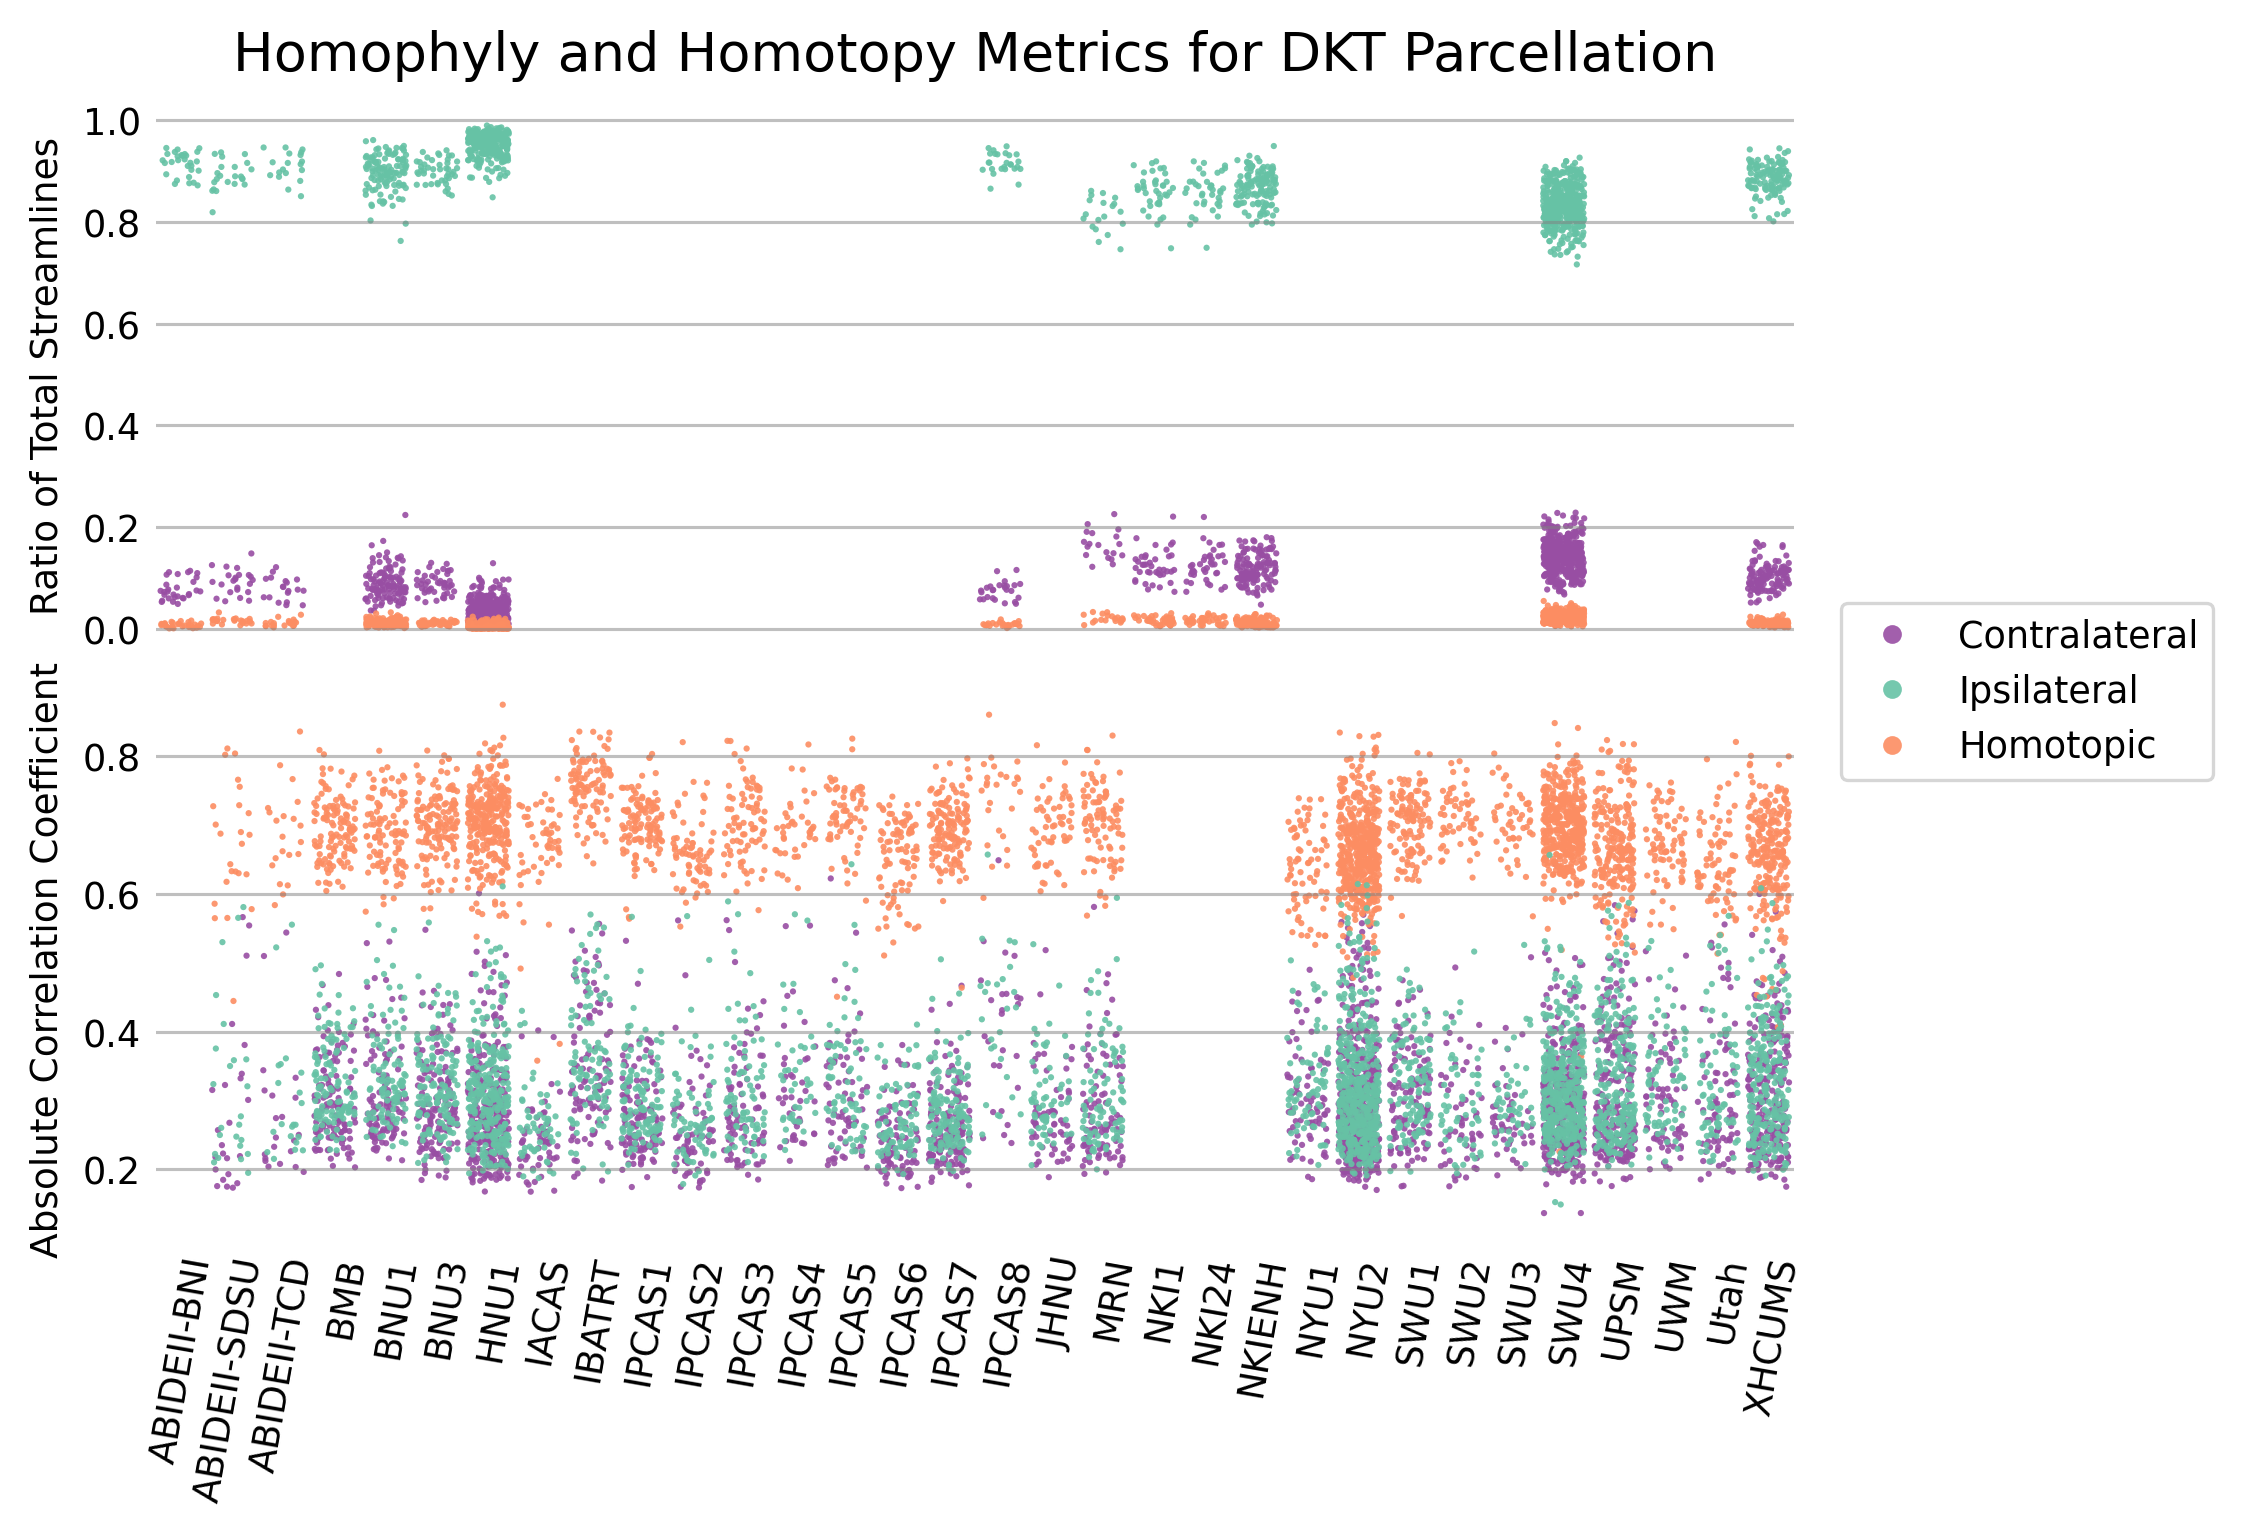

In [4]:
# Set up the plot
sns.set_context("paper", font_scale=1)
np.random.seed(1)

fig, ax = plt.subplots(
    nrows=2, dpi=300, figsize=(6, 5), sharex=True, constrained_layout=True
)
sns.despine(bottom=True, left=True)

for i in np.linspace(0, 1, 6):
    ax[0].axhline(y=i, color="gray", linestyle="-", lw=0.75, alpha=0.5)

for i in np.linspace(0.2, 0.8, 4):
    ax[1].axhline(y=i, color="gray", linestyle="-", lw=0.75, alpha=0.5)


plot_dict = dict(
    palette=["#984ea3", "#66c2a5", "#fc8d62"],
    zorder=1,
    x="Dataset",
    y="Value",
    hue="Type",
    alpha=0.9,
    legend=True,
    size=1.5,
    jitter=0.4,
    hue_order=["Contra", "Ipsi", "Hom"],
)

# Top panel
parc = "dkt"
df = pd.read_csv(f"../../ipsi_files/dwi_ipsi_{parc}.csv", delimiter=" ")
df = df[df.Dataset != "Dataset"]
df.Value = df.Value.astype(float)
uniques = np.unique(df.Dataset)

for i in datasets:
    if i not in uniques:
        df.loc[df.index[-1] + 1] = {
            "Dataset": i,
            "Atlas": "DKT",
            "Type": "Ipsi",
            "Value": np.nan,
        }

df.Dataset.replace(replace, inplace=True)
df.sort_values(by=["Dataset", "Type"], inplace=True)
sns.stripplot(data=df, ax=ax[0], **plot_dict)
ax[0].get_legend().remove()

# Bottome panel
parc = "dkt"
df = pd.read_csv(f"../../ipsi_files/func_ipsi_{parc}.csv", delimiter=" ")
df = df[df.Dataset != "Dataset"]
df.Value = df.Value.astype(float)
uniques = np.unique(df.Dataset)

for i in datasets:
    if i not in uniques:
        df.loc[df.index[-1] + 1] = {
            "Dataset": i,
            "Atlas": "DKT",
            "Type": "Ipsi",
            "Value": np.nan,
        }

df.Dataset.replace(replace, inplace=True)
df.sort_values(by=["Dataset", "Type"], inplace=True)
sns.stripplot(data=df, ax=ax[1], **plot_dict)
ax[1].get_legend().remove()

plt.setp(ax[1].get_xticklabels(), rotation=80, ha="right", rotation_mode="anchor")

dx = 15 / 300.0
dy = 0 / 300.0
offset = mpl.transforms.ScaledTranslation(-dx, dy, fig.dpi_scale_trans)
# apply offset transform to all x ticklabels.
for axes in [ax[0], ax[1]]:
    for label in axes.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)


# Deal with legends
handles, labels = ax[1].get_legend_handles_labels()

legend = fig.legend(
    handles[:],
    ["Contralateral", "Ipsilateral", "Homotopic"],
    ncol=1,
    loc="center right",
    bbox_to_anchor=(1.23, .55),
    bbox_transform=plt.gcf().transFigure,
    markerscale=3,
)


for axes in ax:
    length = 0
    axes.xaxis.set_tick_params(length=length, width=1)
    axes.yaxis.set_tick_params(length=length, width=1)


ax[0].set_ylabel("Ratio of Total Streamlines", fontsize=9)
ax[1].set_ylabel("Absolute Correlation Coefficient", fontsize=9)
ax[0].set_title("Homophyly and Homotopy Metrics for DKT Parcellation", fontsize=13)
ax[1].set_xlabel("")

fig.savefig("./figures/figure4.pdf", bbox_inches="tight", dpi=300)
fig.savefig("./figures/figure4.png", bbox_inches="tight", dpi=300)